# **Automatidata project**
**Translate Data into Insights - Exploratory Data Analysis**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action.

Luana Rodriquez, the senior data analyst at Automatidata, requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 


# Exploratory data analysis

In this section, the data provided is examined and prepared for analysis. Also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 



**The purpose** of this project is to conduct exploratory data analysis on a provided data set. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results




# **Visualize a story in Tableau and Python**

# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>



Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
  * Use histograms to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
      * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:




           * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
          * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
          * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.



### Task 1. Imports, links, and loading


In [1]:
# Import packages and libraries
#==> ENTER YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 



### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess the data.

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 


What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?




In [3]:
#==> ENTER YOUR CODE HERE
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
#==> ENTER YOUR CODE HERE
df.size

408582

In [5]:
#==> ENTER YOUR CODE HERE
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
#==> ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data. 

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 


### Task 3. Data visualization


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 



In [7]:
# Convert data columns to datetime
#==> ENTER YOUR CODE HERE
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

**trip distance**

<Axes: xlabel='trip_distance'>

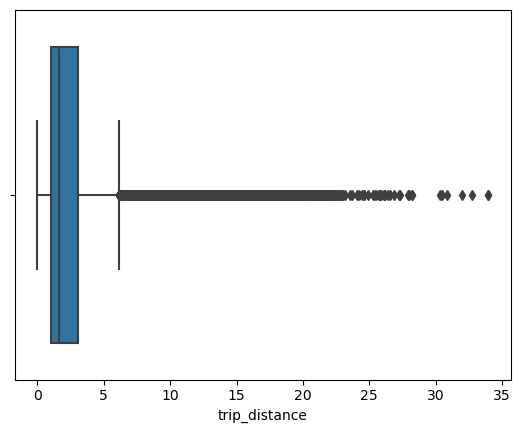

In [8]:
# Create box plot of trip_distance
#==> ENTER YOUR CODE HERE
sns.boxplot(data=df,x='trip_distance')

<Axes: xlabel='trip_distance', ylabel='Count'>

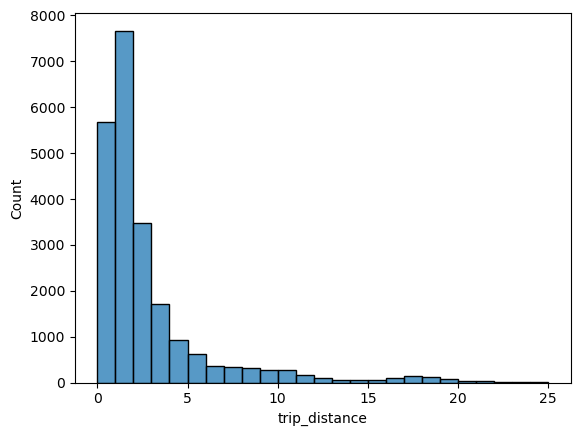

In [9]:
# Create histogram of trip_distance
#==> ENTER YOUR CODE HERE
sns.histplot(df['trip_distance'],bins=range(0,26,1))

**total amount**

<Axes: xlabel='total_amount'>

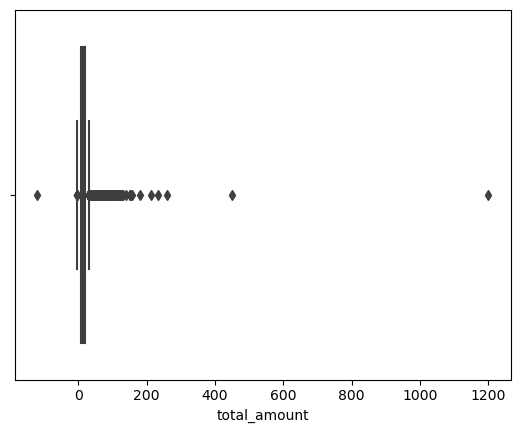

In [10]:
# Create box plot of total_amount
#==> ENTER YOUR CODE HERE
sns.boxplot(data=df,x=df['total_amount'])

<Axes: xlabel='total_amount', ylabel='Count'>

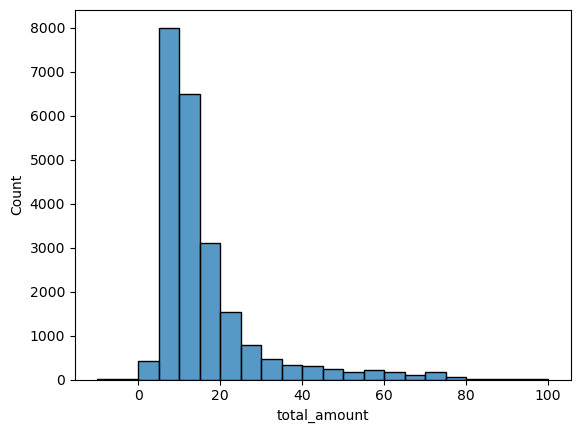

In [11]:
# Create histogram of total_amount
#==> ENTER YOUR CODE HERE
sns.histplot(df['total_amount'],bins=range(-10,101,5))

**tip amount**

<Axes: xlabel='tip_amount'>

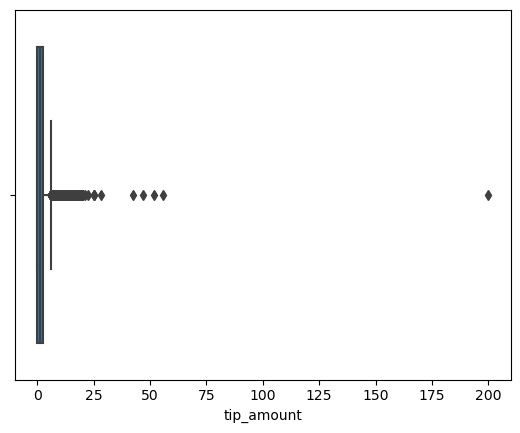

In [12]:
# Create box plot of tip_amount
#==> ENTER YOUR CODE HERE
sns.boxplot(data=df,x=df['tip_amount'])

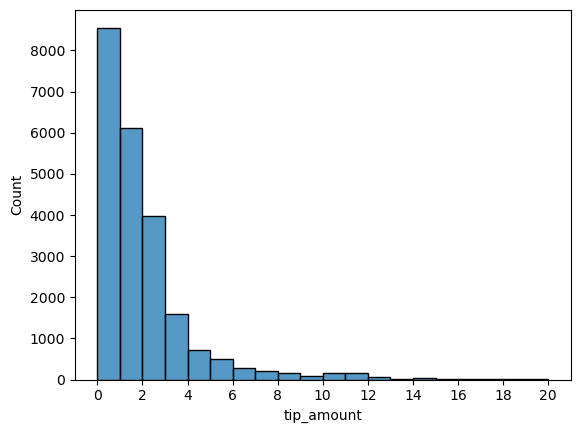

In [13]:
# Create histogram of tip_amount
#==> ENTER YOUR CODE HERE
ax=sns.histplot(df['tip_amount'],bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
plt.show()

**tip_amount by vendor**

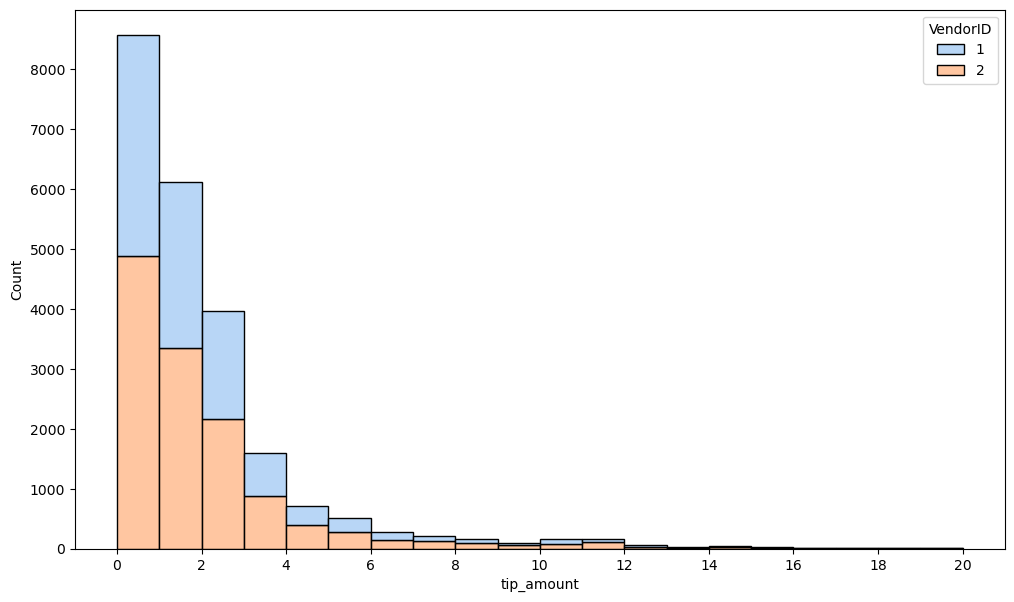

In [14]:
# Create histogram of tip_amount by vendor
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
ax=sns.histplot(data=df,x='tip_amount',bins=range(0,21,1),hue='VendorID',palette='pastel',multiple='stack')
ax.set_xticks(range(0,21,2))
plt.show()

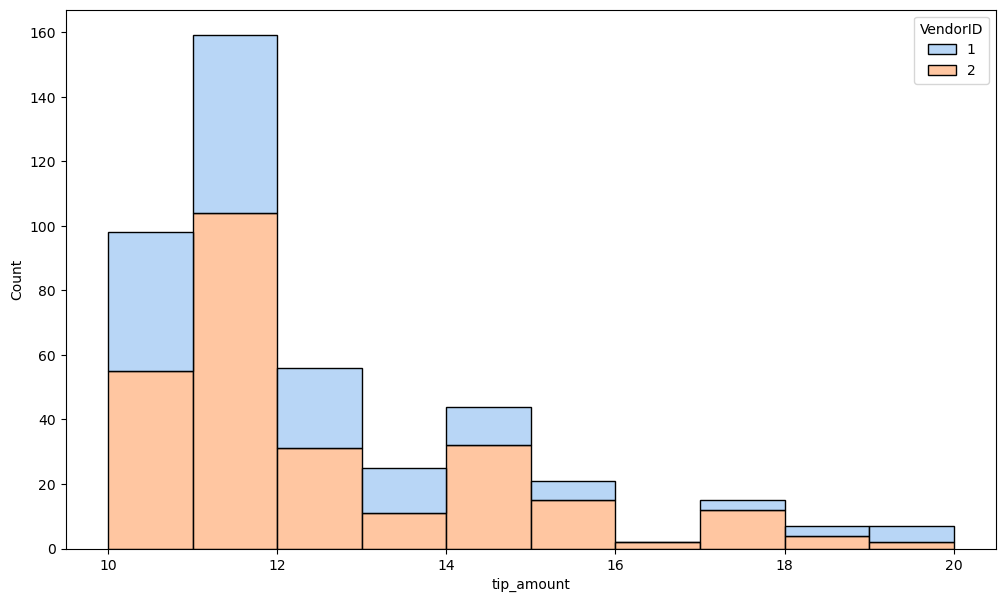

In [15]:
# Create histogram of tip_amount by vendor for tips > $10 
#==> ENTER YOUR CODE HERE
tips10 = df[df['tip_amount']>10]
plt.figure(figsize=(12,7))
ax=sns.histplot(data=tips10,x='tip_amount',bins=range(10,21,1),hue='VendorID',palette='pastel',multiple='stack')
ax.set_xticks(range(10,21,2))
plt.show()

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [16]:
#==> ENTER YOUR CODE HERE
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [17]:
# Calculate mean tips by passenger_count
#==> ENTER YOUR CODE HERE
mean_pass = df.groupby(['passenger_count'])[['tip_amount']].mean()
mean_pass

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


<Axes: xlabel='passenger_count', ylabel='tip_amount'>

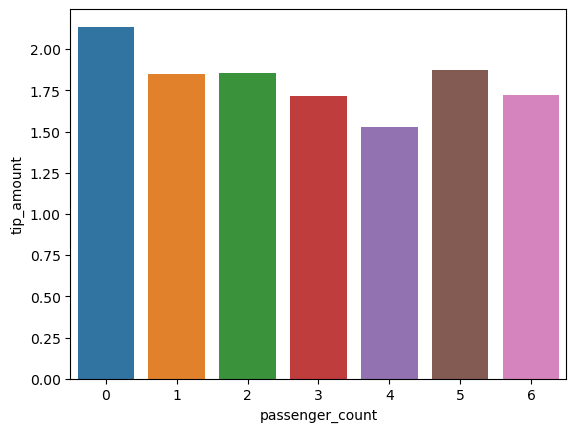

In [18]:
# Create bar plot for mean tips by passenger count
#==> ENTER YOUR CODE HERE
sns.barplot(x=mean_pass.index,y=mean_pass['tip_amount'])

**Create month and day columns**

In [19]:
# Create a month column
#==> ENTER YOUR CODE HERE
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
#==> ENTER YOUR CODE HERE
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


**Plot total ride count by month**


In [20]:
# Get total number of rides for each month
#==> ENTER YOUR CODE HERE
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [21]:
# Reorder the monthly ride list so months go in order
#==> ENTER YOUR CODE HERE
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [22]:
# Show the index
#==> ENTER YOUR CODE HERE
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

<Axes: ylabel='month'>

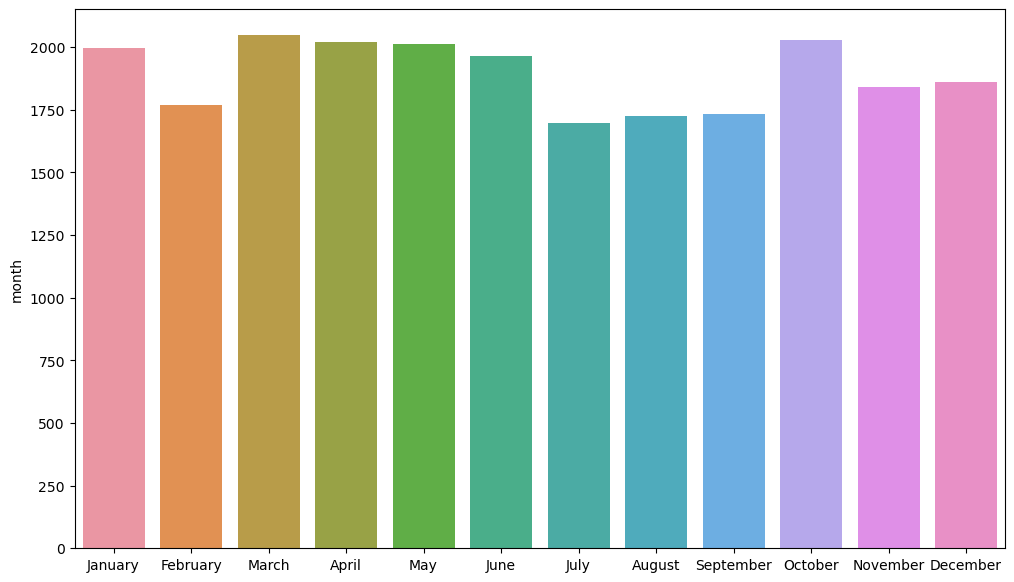

In [23]:
# Create a bar plot of total rides per month
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
sns.barplot(x=monthly_rides.index,y=monthly_rides)

**Plot total ride count by day**


In [24]:
# Repeat the above process, this time for rides by day
#==> ENTER YOUR CODE HERE
daily_rides = df['day'].value_counts()
day_order = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

<Axes: ylabel='day'>

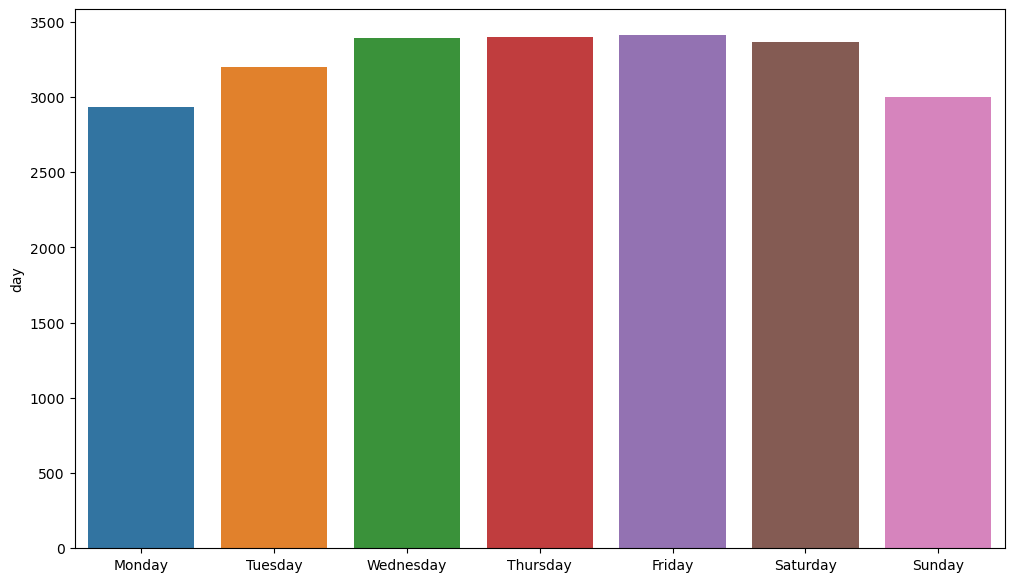

In [25]:
# Create bar plot for ride count by day
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
sns.barplot(x=daily_rides.index,y=daily_rides)

**Plot total revenue by day of the week**


In [26]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


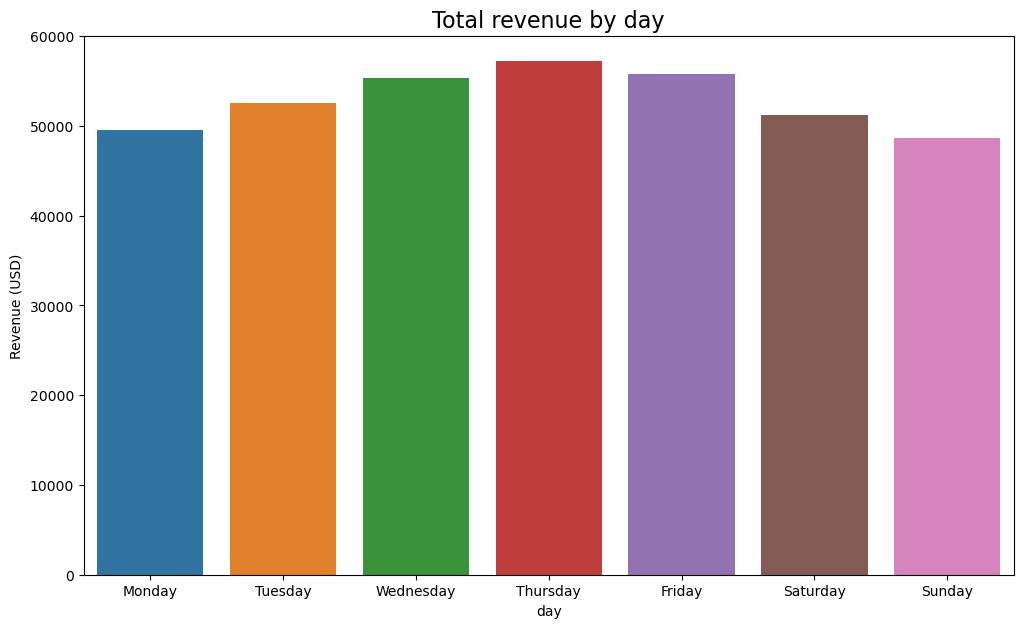

In [27]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

**Plot total revenue by month**

In [28]:
# Repeat the process, this time for total revenue by month
#==> ENTER YOUR CODE HERE
revenue_per_month = df.groupby(['month'])[['total_amount']].sum()
revenue_per_month = revenue_per_month.reindex(index=month_order)
revenue_per_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


<Axes: xlabel='month', ylabel='total_amount'>

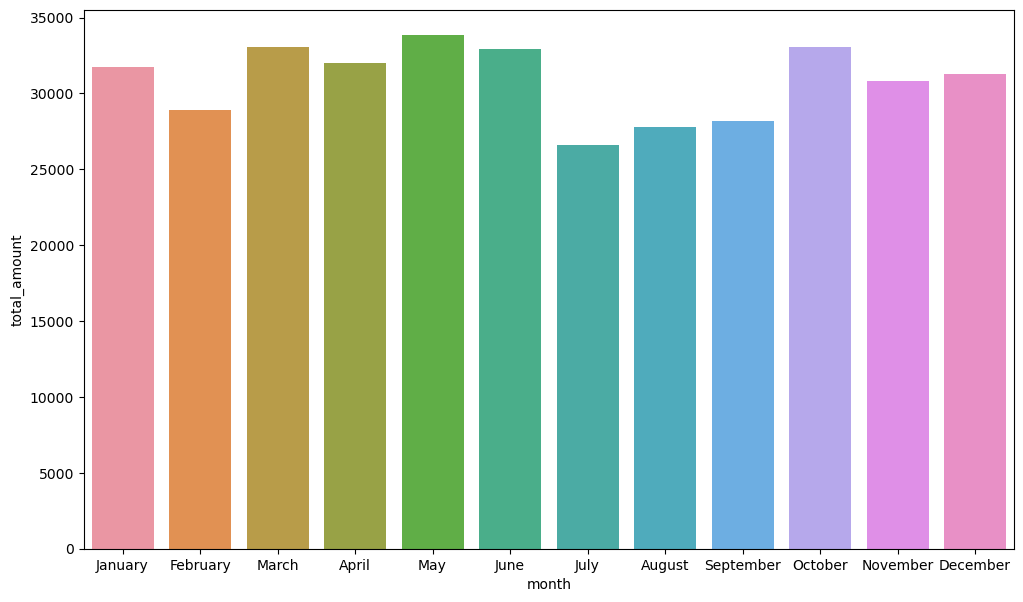

In [29]:
# Create a bar plot of total revenue by month
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
sns.barplot(x=revenue_per_month.index,y=revenue_per_month['total_amount'])

**Plot mean trip distance by drop-off location**

In [30]:
# Get number of unique drop-off location IDs
#==> ENTER YOUR CODE HERE
df['DOLocationID'].nunique()

216

In [31]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


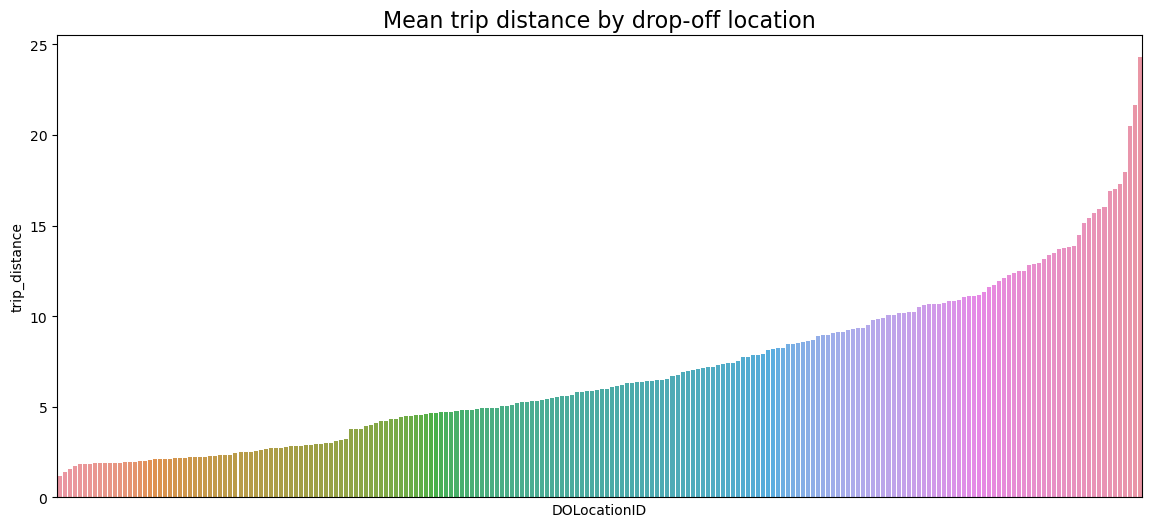

In [32]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

## BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

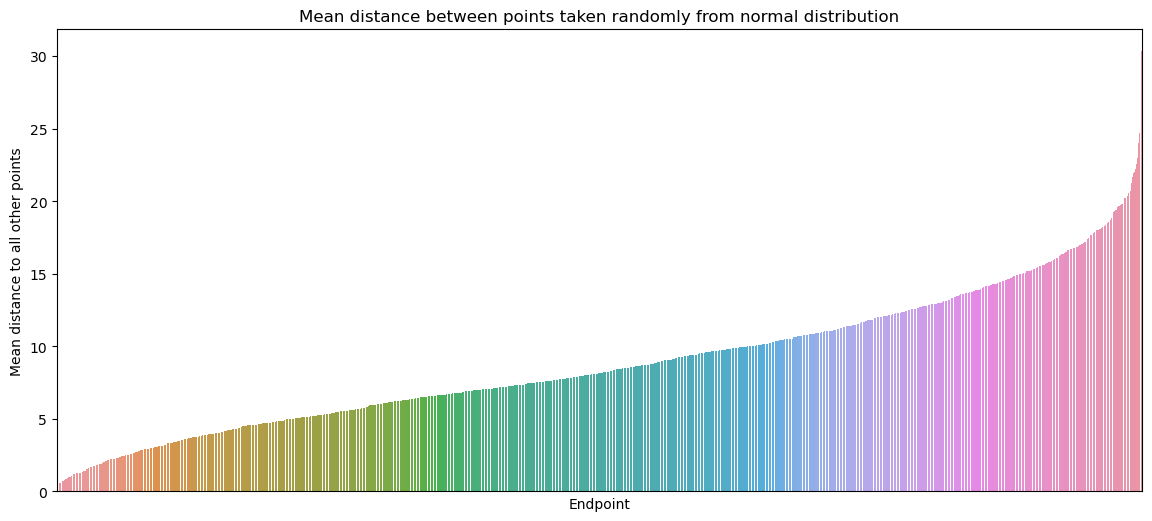

In [33]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [34]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

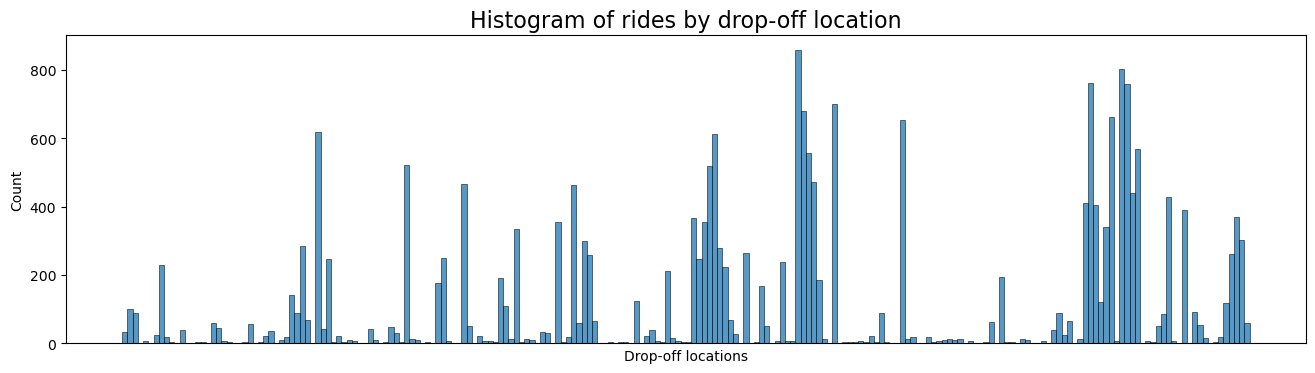

In [35]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 


### Task 4a. Results and evaluation

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 


I have learned that the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.


In [36]:
#==> ENTER YOUR CODE HERE
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [37]:
#==> ENTER YOUR CODE HERE
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


### Task 4b. Conclusion


You have visualized the data you need. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

Why is it important to conduct Exploratory Data Analysis? Why are the data visualizations provided in this notebook useful?



EDA is important because ... 

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.* 

Visualizations helped me understand ..

* *That this dataset has some outliers that we will need to make decisions on prior to designing a model.* 
